Taller 7

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU

Análisis de Datos

In [42]:
df = pd.read_csv('/Users/lauracalderon/Desktop/SÉPTIMO SEMESTRE/Analítica Computacional/Taller 7/Taller7_analitica/heart.csv')

# 1. Verificar duplicados
duplicados = df.duplicated().sum()
print(f'Duplicados: {duplicados}')

# 2. Identificar valores faltantes
faltantes = df.isnull().sum()
print('Valores faltantes por columna:')
print(faltantes)

# 3. Resumen estadístico para identificar posibles valores anómalos
print('Resumen estadístico:')
print(df.describe())

# 4. Revisar las columnas que son categóricas y convertirlas en el tipo adecuado
print('Tipos de datos originales:')
print(df.dtypes)

Duplicados: 0
Valores faltantes por columna:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Resumen estadístico:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.594059    0.676568    3.108911  131.785479  246.547855    0.148515   
std      9.016370    0.468560    1.028414   17.748338   52.175933    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000

Limpieza de Datos

In [43]:
df = df.drop_duplicates()

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.7373 - loss: 0.6192 - val_accuracy: 0.7755 - val_loss: 0.6014
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7983 - loss: 0.5940 - val_accuracy: 0.7755 - val_loss: 0.5830
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7488 - loss: 0.5845 - val_accuracy: 0.7755 - val_loss: 0.5664
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7567 - loss: 0.5642 - val_accuracy: 0.7755 - val_loss: 0.5499
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7461 - loss: 0.5528 - val_accuracy: 0.7755 - val_loss: 0.5335
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7592 - loss: 0.5597 - val_accuracy: 0.7755 - val_loss: 0.5195
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7757 - loss: 0.5252 - val_accuracy: 0.7755 - val_loss: 0.5058
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7600 - loss: 0.5044 - val_accuracy: 0.7755 - val_loss: 0.4918
Epoch 9/50


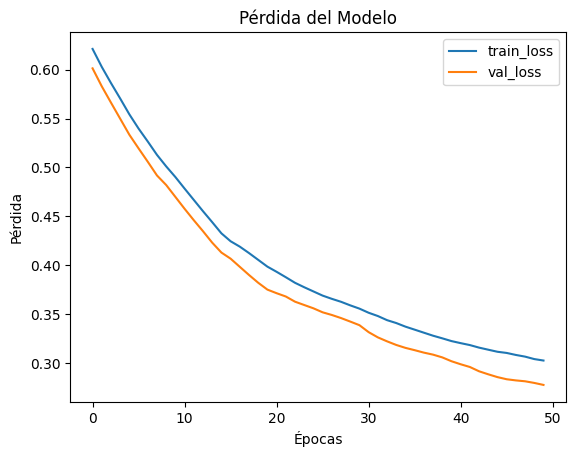

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Accuracy: 0.8360655737704918
Precision: 0.7333333333333333
Recall: 0.6470588235294118
F1 Score: 0.6875


In [44]:
selected_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
                     'exang', 'oldpeak', 'slope', 'ca', 'thal','target']
df = df[selected_features]

# 1. Definir columnas categóricas y numéricas
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']  
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# 2. Preprocesamiento de variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features) 
    ]
) 

# 3. Separar características (X) y etiquetas (y)
X = df.drop(columns='target')
y = df['target']

# 4. Aplicar transformación a los datos
X_preprocessed = preprocessor.fit_transform(X)

# 5. Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# 6. Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

# 7. Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 8. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# 9. Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# 10. Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# 11. Calcular y mostrar las métricas de rendimiento
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes)}')
print(f'Precision: {precision_score(y_test, y_pred_classes)}')
print(f'Recall: {recall_score(y_test, y_pred_classes)}')
print(f'F1 Score: {f1_score(y_test, y_pred_classes)}')

# 3. Modificar el optimizador empleado

### 1. Modificación: Usar RMSprop

In [45]:
model_rmsprop = Sequential()
model_rmsprop.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model_rmsprop.add(Dense(8, activation='relu'))
model_rmsprop.add(Dense(1, activation='sigmoid')) 

model_rmsprop.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_rmsprop = model_rmsprop.fit(X_train, y_train, epochs=50, validation_split=0.2)

y_pred_rmsprop = model_rmsprop.predict(X_test)
y_pred_classes_rmsprop = (y_pred_rmsprop > 0.5).astype("int32")

print('Resultados con RMSprop:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes_rmsprop)}')
print(f'Precision: {precision_score(y_test, y_pred_classes_rmsprop)}')
print(f'Recall: {recall_score(y_test, y_pred_classes_rmsprop)}')
print(f'F1 Score: {f1_score(y_test, y_pred_classes_rmsprop)}')


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.7291 - loss: 0.6034 - val_accuracy: 0.7551 - val_loss: 0.5405
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7014 - loss: 0.6046 - val_accuracy: 0.7551 - val_loss: 0.5265
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6897 - loss: 0.5896 - val_accuracy: 0.7551 - val_loss: 0.5199
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7317 - loss: 0.5620 - val_accuracy: 0.7551 - val_loss: 0.5119
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7501 - loss: 0.5650 - val_accuracy: 0.7551 - val_loss: 0.5024
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7450 - loss: 0.5589 - val_accuracy: 0.7551 - val_loss: 0.4932
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7681 - loss: 0.5276 - val_accuracy: 0.7551 - val_loss: 0.4851
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7998 - loss: 0.4959 - val_accuracy: 0.7551 - val_loss: 0.4741
Epoch 9/50
7/7 

### 2. Modificación: Usar SGD

In [46]:
model_sgd = Sequential()
model_sgd.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model_sgd.add(Dense(8, activation='relu'))
model_sgd.add(Dense(1, activation='sigmoid')) 

model_sgd.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history_sgd = model_sgd.fit(X_train, y_train, epochs=50, validation_split=0.2)

y_pred_sgd = model_sgd.predict(X_test)
y_pred_classes_sgd = (y_pred_sgd > 0.5).astype("int32")

print('Resultados con SGD:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes_sgd)}')
print(f'Precision: {precision_score(y_test, y_pred_classes_sgd)}')
print(f'Recall: {recall_score(y_test, y_pred_classes_sgd)}')
print(f'F1 Score: {f1_score(y_test, y_pred_classes_sgd)}')


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.4067 - loss: 0.7866 - val_accuracy: 0.4694 - val_loss: 0.7526
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4192 - loss: 0.7562 - val_accuracy: 0.4898 - val_loss: 0.7214
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4598 - loss: 0.7313 - val_accuracy: 0.5306 - val_loss: 0.6971
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4669 - loss: 0.7203 - val_accuracy: 0.5714 - val_loss: 0.6795
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5527 - loss: 0.6885 - val_accuracy: 0.6531 - val_loss: 0.6668
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5983 - loss: 0.6639 - val_accuracy: 0.6735 - val_loss: 0.6521
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5977 - loss: 0.6637 - val_accuracy: 0.6735 - val_loss: 0.6420
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6338 - loss: 0.6548 - val_accuracy: 0.6939 - val_loss: 0.6325
Epoch 9/50
7/

# 4. Modifique la tasa de aprendizaje del optimizador empleado

In [47]:
from tensorflow.keras.optimizers import Adam

model_lr_low = Sequential()
model_lr_low.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model_lr_low.add(Dense(8, activation='relu'))
model_lr_low.add(Dense(1, activation='sigmoid')) 

optimizer_lr_low = Adam(learning_rate=0.0001)
model_lr_low.compile(optimizer=optimizer_lr_low, loss='binary_crossentropy', metrics=['accuracy'])

history_lr_low = model_lr_low.fit(X_train, y_train, epochs=50, validation_split=0.2)

y_pred_lr_low = model_lr_low.predict(X_test)
y_pred_classes_lr_low = (y_pred_lr_low > 0.5).astype("int32")

print('Resultados con learning_rate=0.0001:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes_lr_low)}')
print(f'Precision: {precision_score(y_test, y_pred_classes_lr_low)}')
print(f'Recall: {recall_score(y_test, y_pred_classes_lr_low)}')
print(f'F1 Score: {f1_score(y_test, y_pred_classes_lr_low)}')


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7204 - loss: 0.5972 - val_accuracy: 0.7755 - val_loss: 0.5901
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7347 - loss: 0.5947 - val_accuracy: 0.7755 - val_loss: 0.5880
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6987 - loss: 0.6012 - val_accuracy: 0.7755 - val_loss: 0.5858
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7168 - loss: 0.6029 - val_accuracy: 0.7755 - val_loss: 0.5838
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7116 - loss: 0.5933 - val_accuracy: 0.7755 - val_loss: 0.5819
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7370 - loss: 0.5822 - val_accuracy: 0.7755 - val_loss: 0.5799
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7179 - loss: 0.5968 - val_accuracy: 0.7755 - val_loss: 0.5780
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7196 - loss: 0.5936 - val_accuracy: 0.7755 - val_loss: 0.5761
Epoch 9/50
7/7 ━━━

In [48]:
model_lr_default = Sequential()
model_lr_default.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model_lr_default.add(Dense(8, activation='relu'))
model_lr_default.add(Dense(1, activation='sigmoid'))

optimizer_lr_default = Adam(learning_rate=0.001)
model_lr_default.compile(optimizer=optimizer_lr_default, loss='binary_crossentropy', metrics=['accuracy'])

history_lr_default = model_lr_default.fit(X_train, y_train, epochs=50, validation_split=0.2)

y_pred_lr_default = model_lr_default.predict(X_test)
y_pred_classes_lr_default = (y_pred_lr_default > 0.5).astype("int32")

print('Resultados con learning_rate=0.001 (default):')
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes_lr_default)}')
print(f'Precision: {precision_score(y_test, y_pred_classes_lr_default)}')
print(f'Recall: {recall_score(y_test, y_pred_classes_lr_default)}')
print(f'F1 Score: {f1_score(y_test, y_pred_classes_lr_default)}')


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5704 - loss: 0.6751 - val_accuracy: 0.7347 - val_loss: 0.5867
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6203 - loss: 0.6731 - val_accuracy: 0.7755 - val_loss: 0.5654
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6937 - loss: 0.6274 - val_accuracy: 0.7959 - val_loss: 0.5469
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6737 - loss: 0.6259 - val_accuracy: 0.7959 - val_loss: 0.5298
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6956 - loss: 0.6064 - val_accuracy: 0.7959 - val_loss: 0.5155
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7374 - loss: 0.5752 - val_accuracy: 0.7959 - val_loss: 0.5032
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7359 - loss: 0.5731 - val_accuracy: 0.7959 - val_loss: 0.4934
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7268 - loss: 0.5903 - val_accuracy: 0.7959 - val_loss: 0.4871
Epoch 9/50
7/7 ━━

In [49]:
model_lr_high = Sequential()
model_lr_high.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model_lr_high.add(Dense(8, activation='relu'))
model_lr_high.add(Dense(1, activation='sigmoid')) 

optimizer_lr_high = Adam(learning_rate=0.01)
model_lr_high.compile(optimizer=optimizer_lr_high, loss='binary_crossentropy', metrics=['accuracy'])

history_lr_high = model_lr_high.fit(X_train, y_train, epochs=50, validation_split=0.2)

y_pred_lr_high = model_lr_high.predict(X_test)
y_pred_classes_lr_high = (y_pred_lr_high > 0.5).astype("int32")

print('Resultados con learning_rate=0.01:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes_lr_high)}')
print(f'Precision: {precision_score(y_test, y_pred_classes_lr_high)}')
print(f'Recall: {recall_score(y_test, y_pred_classes_lr_high)}')
print(f'F1 Score: {f1_score(y_test, y_pred_classes_lr_high)}')


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5449 - loss: 0.6955 - val_accuracy: 0.8367 - val_loss: 0.5559
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7762 - loss: 0.5575 - val_accuracy: 0.7959 - val_loss: 0.4287
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7668 - loss: 0.4426 - val_accuracy: 0.8571 - val_loss: 0.3306
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7518 - loss: 0.4128 - val_accuracy: 0.8980 - val_loss: 0.2749
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8669 - loss: 0.3177 - val_accuracy: 0.9184 - val_loss: 0.2553
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8888 - loss: 0.2898 - val_accuracy: 0.9184 - val_loss: 0.2491
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8590 - loss: 0.2860 - val_accuracy: 0.8980 - val_loss: 0.2474
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8843 - loss: 0.2668 - val_accuracy: 0.8776 - val_loss: 0.2526
Epoch 9/50
7/7 ━━━

# 5. Modifique el número de neuronas

### Modelo 1: Con menos neuronas: 8 y 4

In [50]:
model_fewer_neurons = Sequential()
model_fewer_neurons.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
model_fewer_neurons.add(Dense(4, activation='relu'))
model_fewer_neurons.add(Dense(1, activation='sigmoid'))

model_fewer_neurons.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_fewer_neurons = model_fewer_neurons.fit(X_train, y_train, epochs=50, validation_split=0.2)

y_pred_fewer_neurons = model_fewer_neurons.predict(X_test)
y_pred_classes_fewer_neurons = (y_pred_fewer_neurons > 0.5).astype("int32")

print('Resultados con menos neuronas (8, 4):')
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes_fewer_neurons)}')
print(f'Precision: {precision_score(y_test, y_pred_classes_fewer_neurons)}')
print(f'Recall: {recall_score(y_test, y_pred_classes_fewer_neurons)}')
print(f'F1 Score: {f1_score(y_test, y_pred_classes_fewer_neurons)}')


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.1677 - loss: 0.9516 - val_accuracy: 0.1837 - val_loss: 0.9388
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2157 - loss: 0.9161 - val_accuracy: 0.2041 - val_loss: 0.9073
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2339 - loss: 0.8803 - val_accuracy: 0.2449 - val_loss: 0.8809
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2672 - loss: 0.8583 - val_accuracy: 0.2653 - val_loss: 0.8568
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3054 - loss: 0.8197 - val_accuracy: 0.2857 - val_loss: 0.8369
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3129 - loss: 0.8098 - val_accuracy: 0.3061 - val_loss: 0.8179
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3391 - loss: 0.7849 - val_accuracy: 0.3061 - val_loss: 0.8001
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3948 - loss: 0.7740 - val_accuracy: 0.3265 - val_loss: 0.7829
Epoch 9/50
7/7 ━━━

### Modelo 2: Con más neuronas: 32 y 16

In [51]:
model_more_neurons = Sequential()
model_more_neurons.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model_more_neurons.add(Dense(16, activation='relu'))
model_more_neurons.add(Dense(1, activation='sigmoid'))

model_more_neurons.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_more_neurons = model_more_neurons.fit(X_train, y_train, epochs=50, validation_split=0.2)

y_pred_more_neurons = model_more_neurons.predict(X_test)
y_pred_classes_more_neurons = (y_pred_more_neurons > 0.5).astype("int32")

print('Resultados con más neuronas (32, 16):')
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes_more_neurons)}')
print(f'Precision: {precision_score(y_test, y_pred_classes_more_neurons)}')
print(f'Recall: {recall_score(y_test, y_pred_classes_more_neurons)}')
print(f'F1 Score: {f1_score(y_test, y_pred_classes_more_neurons)}')


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5072 - loss: 0.7150 - val_accuracy: 0.5918 - val_loss: 0.6791
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6976 - loss: 0.6550 - val_accuracy: 0.6735 - val_loss: 0.6454
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7088 - loss: 0.6280 - val_accuracy: 0.7347 - val_loss: 0.6156
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7428 - loss: 0.5947 - val_accuracy: 0.7551 - val_loss: 0.5908
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7393 - loss: 0.5822 - val_accuracy: 0.7755 - val_loss: 0.5712
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7707 - loss: 0.5437 - val_accuracy: 0.7755 - val_loss: 0.5510
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7569 - loss: 0.5327 - val_accuracy: 0.7755 - val_loss: 0.5293
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7810 - loss: 0.5174 - val_accuracy: 0.8163 - val_loss: 0.5072
Epoch 9/50
7/7 ━━━

### Modelo 3: Con muchas más neuronas: 64 y 32

In [52]:
model_large_neurons = Sequential()
model_large_neurons.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_large_neurons.add(Dense(32, activation='relu'))
model_large_neurons.add(Dense(1, activation='sigmoid'))

model_large_neurons.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_large_neurons = model_large_neurons.fit(X_train, y_train, epochs=50, validation_split=0.2)

y_pred_large_neurons = model_large_neurons.predict(X_test)
y_pred_classes_large_neurons = (y_pred_large_neurons > 0.5).astype("int32")

print('Resultados con muchas más neuronas (64, 32):')
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes_large_neurons)}')
print(f'Precision: {precision_score(y_test, y_pred_classes_large_neurons)}')
print(f'Recall: {recall_score(y_test, y_pred_classes_large_neurons)}')
print(f'F1 Score: {f1_score(y_test, y_pred_classes_large_neurons)}')


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.3357 - loss: 0.7880 - val_accuracy: 0.5918 - val_loss: 0.6824
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6720 - loss: 0.6445 - val_accuracy: 0.7755 - val_loss: 0.5959
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7646 - loss: 0.5674 - val_accuracy: 0.7755 - val_loss: 0.5396
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7132 - loss: 0.5305 - val_accuracy: 0.7755 - val_loss: 0.4983
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7432 - loss: 0.4910 - val_accuracy: 0.7755 - val_loss: 0.4556
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7715 - loss: 0.4459 - val_accuracy: 0.8163 - val_loss: 0.4183
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7942 - loss: 0.4067 - val_accuracy: 0.8367 - val_loss: 0.3845
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8593 - loss: 0.3675 - val_accuracy: 0.8980 - val_loss: 0.3563
Epoch 9/50
7/7 ━━

# 6. Modifique el número de capas

### Modelo con una sola capa oculta

In [53]:
model_one_layer = Sequential()
model_one_layer.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model_one_layer.add(Dense(1, activation='sigmoid'))


model_one_layer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_one_layer = model_one_layer.fit(X_train, y_train, epochs=50, validation_split=0.2)

y_pred_one_layer = model_one_layer.predict(X_test)
y_pred_classes_one_layer = (y_pred_one_layer > 0.5).astype("int32")

print('Resultados con una sola capa (16 neuronas):')
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes_one_layer)}')
print(f'Precision: {precision_score(y_test, y_pred_classes_one_layer)}')
print(f'Recall: {recall_score(y_test, y_pred_classes_one_layer)}')
print(f'F1 Score: {f1_score(y_test, y_pred_classes_one_layer)}')


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3011 - loss: 0.8619 - val_accuracy: 0.3061 - val_loss: 0.9489
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3135 - loss: 0.8250 - val_accuracy: 0.2857 - val_loss: 0.9045
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3313 - loss: 0.8205 - val_accuracy: 0.2857 - val_loss: 0.8685
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3713 - loss: 0.7730 - val_accuracy: 0.3265 - val_loss: 0.8401
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3864 - loss: 0.7659 - val_accuracy: 0.3673 - val_loss: 0.8173
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4059 - loss: 0.7483 - val_accuracy: 0.3878 - val_loss: 0.7966
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4790 - loss: 0.7121 - val_accuracy: 0.4286 - val_loss: 0.7785
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5171 - loss: 0.6943 - val_accuracy: 0.4490 - val_loss: 0.7624
Epoch 9/50
7/7 ━━━

### Modelo con tres capas ocultas: 16, 8, 4

In [54]:
model_three_layers = Sequential()
model_three_layers.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model_three_layers.add(Dense(8, activation='relu'))
model_three_layers.add(Dense(4, activation='relu'))
model_three_layers.add(Dense(1, activation='sigmoid'))

model_three_layers.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_three_layers = model_three_layers.fit(X_train, y_train, epochs=50, validation_split=0.2)

y_pred_three_layers = model_three_layers.predict(X_test)
y_pred_classes_three_layers = (y_pred_three_layers > 0.5).astype("int32")

print('Resultados con tres capas ocultas (16, 8, 4 neuronas):')
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes_three_layers)}')
print(f'Precision: {precision_score(y_test, y_pred_classes_three_layers)}')
print(f'Recall: {recall_score(y_test, y_pred_classes_three_layers)}')
print(f'F1 Score: {f1_score(y_test, y_pred_classes_three_layers)}')


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6798 - loss: 0.6254 - val_accuracy: 0.7959 - val_loss: 0.5916
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6963 - loss: 0.5992 - val_accuracy: 0.7755 - val_loss: 0.5708
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7304 - loss: 0.5679 - val_accuracy: 0.7755 - val_loss: 0.5514
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7231 - loss: 0.5621 - val_accuracy: 0.7551 - val_loss: 0.5324
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7278 - loss: 0.5339 - val_accuracy: 0.7551 - val_loss: 0.5142
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7420 - loss: 0.5133 - val_accuracy: 0.7551 - val_loss: 0.4967
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7666 - loss: 0.4828 - val_accuracy: 0.7551 - val_loss: 0.4801
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7455 - loss: 0.4671 - val_accuracy: 0.7551 - val_loss: 0.4648
Epoch 9/50
7/7 ━━

### Modelo con cuatro capas ocultas: 32, 16, 8, 4

In [55]:
model_four_layers = Sequential()
model_four_layers.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model_four_layers.add(Dense(16, activation='relu'))
model_four_layers.add(Dense(8, activation='relu')) 
model_four_layers.add(Dense(4, activation='relu'))
model_four_layers.add(Dense(1, activation='sigmoid')) 

model_four_layers.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_four_layers = model_four_layers.fit(X_train, y_train, epochs=50, validation_split=0.2)

y_pred_four_layers = model_four_layers.predict(X_test)
y_pred_classes_four_layers = (y_pred_four_layers > 0.5).astype("int32")

print('Resultados con cuatro capas ocultas (32, 16, 8, 4 neuronas):')
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes_four_layers)}')
print(f'Precision: {precision_score(y_test, y_pred_classes_four_layers)}')
print(f'Recall: {recall_score(y_test, y_pred_classes_four_layers)}')
print(f'F1 Score: {f1_score(y_test, y_pred_classes_four_layers)}')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4006 - loss: 0.6948 - val_accuracy: 0.4286 - val_loss: 0.6970
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5485 - loss: 0.6709 - val_accuracy: 0.6735 - val_loss: 0.6732
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7319 - loss: 0.6414 - val_accuracy: 0.7551 - val_loss: 0.6371
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7138 - loss: 0.6190 - val_accuracy: 0.7551 - val_loss: 0.5943
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7276 - loss: 0.5706 - val_accuracy: 0.7551 - val_loss: 0.5483
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7409 - loss: 0.5281 - val_accuracy: 0.7551 - val_loss: 0.5053
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7099 - loss: 0.5024 - val_accuracy: 0.7551 - val_loss: 0.4677
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7214 - loss: 0.4612 - val_accuracy: 0.7551 - val_loss: 0.4347
Epoch 9

# 7. Modifique las funciones de activación

### Modelo 1: Función de activación Tanh en las capas ocultas

In [56]:
model_tanh = Sequential()
model_tanh.add(Dense(16, activation='tanh', input_shape=(X_train.shape[1],)))
model_tanh.add(Dense(8, activation='tanh'))
model_tanh.add(Dense(1, activation='sigmoid'))

model_tanh.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_tanh = model_tanh.fit(X_train, y_train, epochs=50, validation_split=0.2)

y_pred_tanh = model_tanh.predict(X_test)
y_pred_classes_tanh = (y_pred_tanh > 0.5).astype("int32")

print('Resultados con función Tanh:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes_tanh)}')
print(f'Precision: {precision_score(y_test, y_pred_classes_tanh)}')
print(f'Recall: {recall_score(y_test, y_pred_classes_tanh)}')
print(f'F1 Score: {f1_score(y_test, y_pred_classes_tanh)}')


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.4149 - loss: 0.7943 - val_accuracy: 0.4694 - val_loss: 0.7568
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5200 - loss: 0.6925 - val_accuracy: 0.5918 - val_loss: 0.6864
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5973 - loss: 0.6688 - val_accuracy: 0.6735 - val_loss: 0.6324
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6769 - loss: 0.6180 - val_accuracy: 0.7143 - val_loss: 0.5915
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7477 - loss: 0.5651 - val_accuracy: 0.7551 - val_loss: 0.5598
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7479 - loss: 0.5592 - val_accuracy: 0.7959 - val_loss: 0.5416
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7372 - loss: 0.5368 - val_accuracy: 0.7959 - val_loss: 0.5295
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7787 - loss: 0.5272 - val_accuracy: 0.7959 - val_loss: 0.5163
Epoch 9/50
7/7

### Modelo 2: Función de activación Sigmoid en las capas ocultas

In [57]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(16, activation='sigmoid', input_shape=(X_train.shape[1],)))
model_sigmoid.add(Dense(8, activation='sigmoid'))
model_sigmoid.add(Dense(1, activation='sigmoid'))  

model_sigmoid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=50, validation_split=0.2)

y_pred_sigmoid = model_sigmoid.predict(X_test)
y_pred_classes_sigmoid = (y_pred_sigmoid > 0.5).astype("int32")

print('Resultados con función Sigmoid:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes_sigmoid)}')
print(f'Precision: {precision_score(y_test, y_pred_classes_sigmoid)}')
print(f'Recall: {recall_score(y_test, y_pred_classes_sigmoid)}')
print(f'F1 Score: {f1_score(y_test, y_pred_classes_sigmoid)}')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.2536 - loss: 0.7364 - val_accuracy: 0.3673 - val_loss: 0.7044
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3799 - loss: 0.7042 - val_accuracy: 0.7551 - val_loss: 0.6725
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6186 - loss: 0.6814 - val_accuracy: 0.7755 - val_loss: 0.6445
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7133 - loss: 0.6561 - val_accuracy: 0.7551 - val_loss: 0.6205
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7073 - loss: 0.6411 - val_accuracy: 0.7551 - val_loss: 0.6000
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7206 - loss: 0.6215 - val_accuracy: 0.7551 - val_loss: 0.5837
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6726 - loss: 0.6248 - val_accuracy: 0.7551 - val_loss: 0.5734
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6970 - loss: 0.6112 - val_accuracy: 0.7551 - val_loss: 0.5625


### Modelo 3: Función de activación Leaky ReLU en las capas ocultas

In [58]:
model_leaky_relu = Sequential()
model_leaky_relu.add(Dense(16))
model_leaky_relu.add(LeakyReLU(alpha=0.1))
model_leaky_relu.add(Dense(8))
model_leaky_relu.add(LeakyReLU(alpha=0.1)) 
model_leaky_relu.add(Dense(1, activation='sigmoid'))

model_leaky_relu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_leaky_relu = model_leaky_relu.fit(X_train, y_train, epochs=50, validation_split=0.2)

y_pred_leaky_relu = model_leaky_relu.predict(X_test)
y_pred_classes_leaky_relu = (y_pred_leaky_relu > 0.5).astype("int32")

print('Resultados con función Leaky ReLU:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes_leaky_relu)}')
print(f'Precision: {precision_score(y_test, y_pred_classes_leaky_relu)}')
print(f'Recall: {recall_score(y_test, y_pred_classes_leaky_relu)}')
print(f'F1 Score: {f1_score(y_test, y_pred_classes_leaky_relu)}')


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.3743 - loss: 0.7653 - val_accuracy: 0.3878 - val_loss: 0.7314
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4641 - loss: 0.7267 - val_accuracy: 0.5510 - val_loss: 0.7067
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4911 - loss: 0.7133 - val_accuracy: 0.5918 - val_loss: 0.6906
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6359 - loss: 0.6934 - val_accuracy: 0.6327 - val_loss: 0.6777
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6702 - loss: 0.6856 - val_accuracy: 0.7755 - val_loss: 0.6692
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6944 - loss: 0.6762 - val_accuracy: 0.7959 - val_loss: 0.6602
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7804 - loss: 0.6653 - val_accuracy: 0.8163 - val_loss: 0.6515
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8056 - loss: 0.6528 - val_accuracy: 0.8163 - val_loss: 0.6435
Epoch 9/50


# 8. Proponer 2 modelos diferentes al modelo base y compárelos usando todas las métricas. 